# Preprocessing

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [28]:
import pandas as pd
import re
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv("data_resep_new_cleaned_baru.csv")

df['Waktu Masak'] = df['Waktu Masak'].replace('15jam', '1jam')

def convert_waktu_to_minutes(waktu_str):
    waktu_str = str(waktu_str).lower()
    jam = 0
    menit = 0
    jam_match = re.search(r'(\d+)\s*j', waktu_str)
    menit_match = re.search(r'(\d+)\s*mnt', waktu_str)
    if jam_match:
        jam = int(jam_match.group(1))
    if menit_match:
        menit = int(menit_match.group(1))
    return jam * 60 + menit

df['Waktu Masak (menit)'] = df['Waktu Masak'].apply(convert_waktu_to_minutes)

def extract_porsi(porsi_str):
    match = re.search(r'(\d+)', str(porsi_str))
    if match:
        return int(match.group(1))
    return None

df['Jumlah Porsi (int)'] = df['Jumlah Porsi'].apply(extract_porsi)

difficulty_map = {
    'Mudah': 1,
    'Sedang': 2,
    'Cukup Rumit': 3,
    'Kesulitan tidak ditemukan': None
}

df['Tingkat Kesulitan (ordinal)'] = df['Tingkat Kesulitan'].map(difficulty_map)

df.dropna(subset=['bahan-bahan_fix'], inplace=True)
df['bahan_list'] = df['bahan-bahan_fix'].apply(lambda x: [b.strip().lower() for b in str(x).split(',')])

mlb = MultiLabelBinarizer()
bahan_encoded = mlb.fit_transform(df['bahan_list'])

df_bahan_encoded = pd.DataFrame(bahan_encoded, columns=mlb.classes_, index=df.index)

df_final = pd.concat([df, df_bahan_encoded], axis=1)

print("DataFrame Gabungan Akhir:")
display(df_final)


DataFrame Gabungan Akhir:


,Judul Masakan,Waktu Masak,Tingkat Kesulitan,Jumlah Porsi,Bahan-bahan,URL Sumber,Bahan-bahan_cleaned,Bahan-bahan_cleaned_nostop,bahan-bahan_fix,Waktu Masak (menit),...,santan,seledri,serai,tahu,telur,tempe,tomat,udang,wijen,wortel
0,Resep Tempe Goreng Tepung Pedas Krispi yang Bi...,30mnt,Mudah,4 Porsi,"300 g tempe, iris tipis, 150 g tepung terigu, ...",https://www.masakapahariini.com/resep/resep-te...,"['g', 'tempe', 'iris', 'tipis', 'g', 'tepung',...","['tempe', 'tepung', 'terigu', 'tepung', 'maize...","bawang putih, bawang merah, kaldu ayam, cabai ...",30,...,0,0,0,0,0,1,0,0,0,0
1,"Resep Kikil Sapi Kuah Pedas Manis, Empuk, Keny...",2j 30mnt,Sedang,4 Porsi,500 g \t\t\t\ttunjang atau kikil y...,https://www.masakapahariini.com/resep/resep-ki...,"['g', 'tunjang', 'atau', 'kikil', 'yang', 'sud...","['tunjang', 'kikil', 'yang', 'sudah', 'dibersi...","bawang putih, bawang merah, kecap manis, cabai...",150,...,0,0,1,0,0,0,1,0,0,0
2,Resep Tempe Penyet Sambal Petis Sederhana ala ...,30mnt,Mudah,4 Porsi,"300 g tempe, potong tebal 2 cm, ½ sdm garam, 1...",https://www.masakapahariini.com/resep/resep-te...,"['g', 'tempe', 'potong', 'tebal', 'cm', 'sdm',...","['tempe', 'garam', 'ketumbar', 'santan', 'kela...","bawang putih, kecap manis, cabai merah, cabai ...",30,...,1,0,0,0,0,1,0,0,0,0
3,Resep Bakmi Jawa Jogja Goreng Enak dan Gampang...,1jam,Mudah,2 Porsi,"200 g mie basah, 150 g dada ayam fillet, poton...",https://www.masakapahariini.com/resep/resep-ba...,"['g', 'mie', 'basah', 'g', 'dada', 'ayam', 'fi...","['mie', 'basah', 'dada', 'ayam', 'telur', 'aya...","bawang putih, bawang merah, kecap manis, kaldu...",60,...,0,0,0,0,1,0,0,0,0,0
4,"Resep Sayur Asem Bening Sederhana ala Rumahan,...",45mnt,Mudah,4 Porsi,"1 buah \t\t\t\tjagung manis, poton...",https://www.masakapahariini.com/resep/resep-sa...,"['buah', 'jagung', 'manis', 'potong', 'bagian'...","['jagung', 'manis', 'labu', 'siam', 'melinjo',...","bawang merah, kaldu ayam, cabai merah, daun sa...",45,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,Resep Asem Asem Daging Lezat untuk Penggemar R...,50mnt,Sedang,6 Porsi,"500 g daging sapi sengkel, potong-potong, 2000...",https://www.masakapahariini.com/resep/cara-mem...,"['g', 'daging', 'sapi', 'sengkel', 'potongpoto...","['daging', 'sapi', 'asam', 'jawa', 'buncis', '...","bawang putih, bawang merah, kecap manis, cabai...",50,...,0,0,0,0,0,0,1,0,0,0
910,Resep Bakwan Sayur Renyah Tahan Lama,45mnt,Mudah,4 Porsi,"1 butir telur ayam, 5 siung bawang putih, dipa...",https://www.masakapahariini.com/resep/resep-ba...,"['butir', 'telur', 'ayam', 'siung', 'bawang', ...","['telur', 'ayam', 'bawang', 'putih', 'diparut'...","bawang putih, kaldu ayam, daun bawang, telur, ...",45,...,0,0,0,0,1,0,0,0,0,1
911,"Resep Ayam Bakar Bumbu Rujak, Sajian Rumahan F...",1j 15mnt,Mudah,4 Porsi,"1 ekor ayam utuh, potong 4 atau 8, 150 gram ca...",https://www.masakapahariini.com/resep/resep-ay...,"['ekor', 'ayam', 'utuh', 'potong', 'atau', 'gr...","['ayam', 'cabai', 'merah', 'daun', 'jeruk', 'p...","kaldu ayam, cabai merah, daun jeruk, gula pasi...",75,...,1,0,0,0,0,0,0,1,0,0
915,"Resep Martabak Mie Telur Kornet, Kudapan Laris...",25mnt,Mudah,4 Porsi,"100 gram mie telur, 4 butir telur ayam ukuran ...",https://www.masakapahariini.com/resep/resep-ma...,"['gram', 'mie', 'telur', 'butir', 'telur', 'ay...","['mie', 'telur', 'telur', 'ayam', 'sedang', 'k...","daun bawang, kaldu sapi, telur",25,...,0,0,0,0,1,0,0,0,0,0


In [29]:
df_final.to_csv('cleaned_data.csv', index=False)


#Feature Scaling

In [30]:
kolom_scaling = ['Waktu Masak (menit)', 'Jumlah Porsi (int)', 'Tingkat Kesulitan (ordinal)']
data_untuk_scaling = df_final[kolom_scaling]

imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data_untuk_scaling)
df_imputed = pd.DataFrame(data_imputed, columns=kolom_scaling, index=data_untuk_scaling.index)

scaler = StandardScaler()

data_scaled = scaler.fit_transform(df_imputed)

df_scaled = pd.DataFrame(data_scaled, columns=[f'{col}_scaled' for col in kolom_scaling], index=df_final.index)

df_final_scaled = pd.concat([df_final, df_scaled], axis=1)

df_final_scaled = df_final_scaled.drop(columns=kolom_scaling)
df_final_scaled = df_final_scaled.drop(columns=['bahan_list'])

print("DataFrame Final Setelah Scaling:")
print(df_final_scaled.head())

df_final_scaled.to_csv('data_resep_scaled_new.csv', index=False)

DataFrame Final Setelah Scaling:
                                       Judul Masakan Waktu Masak  \
0  Resep Tempe Goreng Tepung Pedas Krispi yang Bi...       30mnt   
1  Resep Kikil Sapi Kuah Pedas Manis, Empuk, Keny...    2j 30mnt   
2  Resep Tempe Penyet Sambal Petis Sederhana ala ...       30mnt   
3  Resep Bakmi Jawa Jogja Goreng Enak dan Gampang...        1jam   
4  Resep Sayur Asem Bening Sederhana ala Rumahan,...       45mnt   

  Tingkat Kesulitan Jumlah Porsi  \
0             Mudah      4 Porsi   
1            Sedang      4 Porsi   
2             Mudah      4 Porsi   
3             Mudah      2 Porsi   
4             Mudah      4 Porsi   

                                         Bahan-bahan  \
0  300 g tempe, iris tipis, 150 g tepung terigu, ...   
1  500 g             \t\t\t\ttunjang atau kikil y...   
2  300 g tempe, potong tebal 2 cm, ½ sdm garam, 1...   
3  200 g mie basah, 150 g dada ayam fillet, poton...   
4  1 buah             \t\t\t\tjagung manis, poton...   

    

In [31]:
df_final_scaled.columns

Index(['Judul Masakan', 'Waktu Masak', 'Tingkat Kesulitan', 'Jumlah Porsi',
       'Bahan-bahan', 'URL Sumber', 'Bahan-bahan_cleaned',
       'Bahan-bahan_cleaned_nostop', 'bahan-bahan_fix', 'asam jawa', 'bawang',
       'bawang merah', 'bawang putih', 'cabai', 'cabai hijau', 'cabai merah',
       'cabai rawit', 'cengkih', 'cuka', 'daging ayam', 'daging kambing',
       'daging sapi', 'daun bawang', 'daun jeruk', 'daun salam', 'garam',
       'gula', 'gula merah', 'gula pasir', 'ikan', 'jagung', 'jahe', 'jamur',
       'jeruk nipis', 'kacang', 'kaldu ayam', 'kaldu sapi', 'kayu manis',
       'kecap manis', 'kemangi', 'kemiri', 'kencur', 'ketumbar', 'kol',
       'kunyit', 'lengkuas', 'limau', 'merica', 'santan', 'seledri', 'serai',
       'tahu', 'telur', 'tempe', 'tomat', 'udang', 'wijen', 'wortel',
       'Waktu Masak (menit)_scaled', 'Jumlah Porsi (int)_scaled',
       'Tingkat Kesulitan (ordinal)_scaled'],
      dtype='object')

# Clustering

Memulai proses clustering untuk k=2 hingga 10...
Selesai untuk k=2, Inertia: 6062.05, Silhouette Score: 0.1427
Selesai untuk k=3, Inertia: 5745.64, Silhouette Score: 0.1207
Selesai untuk k=4, Inertia: 5476.32, Silhouette Score: 0.0767
Selesai untuk k=5, Inertia: 5240.86, Silhouette Score: 0.0730
Selesai untuk k=6, Inertia: 5086.71, Silhouette Score: 0.0733
Selesai untuk k=7, Inertia: 4937.29, Silhouette Score: 0.0637
Selesai untuk k=8, Inertia: 4849.21, Silhouette Score: 0.0647
Selesai untuk k=9, Inertia: 4759.71, Silhouette Score: 0.0629
Selesai untuk k=10, Inertia: 4694.18, Silhouette Score: 0.0586

Visualisasi telah disimpan sebagai 'kmeans_evaluation_manual_features.png'


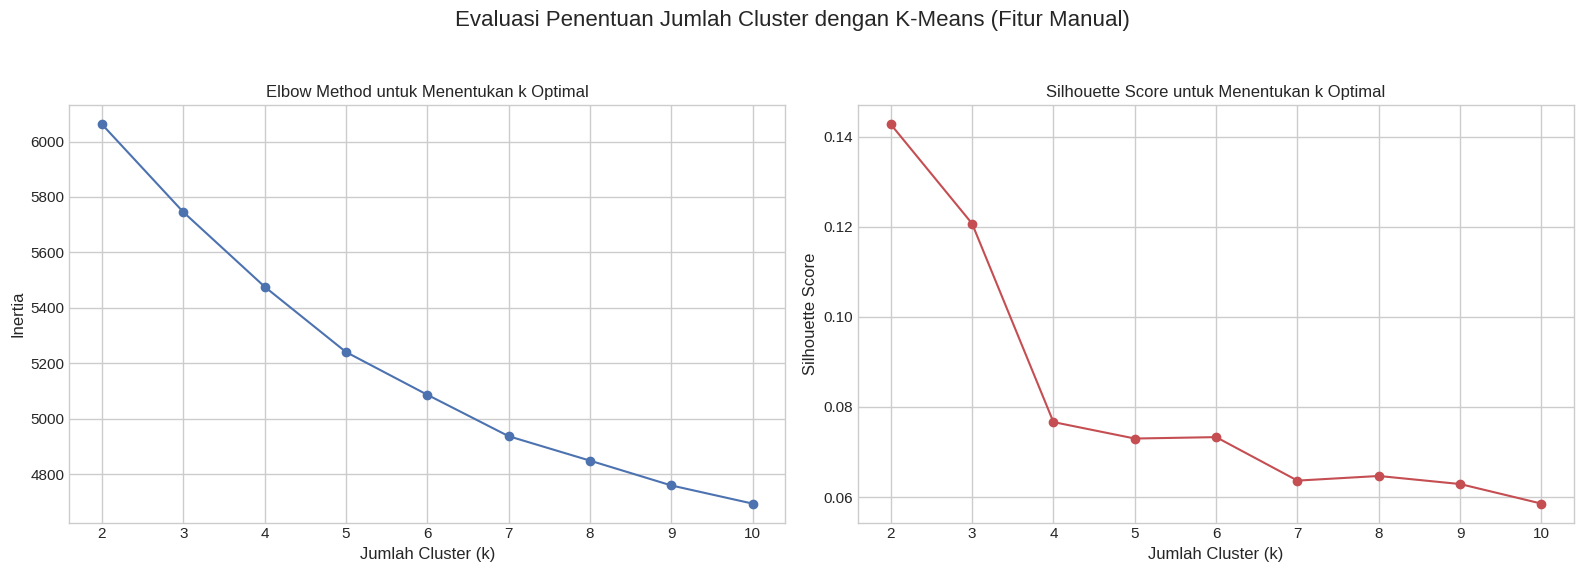

In [32]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

df_final_scaled = pd.read_csv("data_resep_scaled_new.csv")

# Memilih fitur secara manual, akan error jika kolom 'asam jawa' tidak ada
all_columns = df_final_scaled.columns.tolist()
start_feature_index = all_columns.index('asam jawa')
feature_columns = all_columns[start_feature_index:]
features = df_final_scaled[feature_columns]

# Menentukan rentang k yang akan diuji
k_range = range(2, 11)

# Menghitung inertia dan silhouette score untuk setiap k
inertia_values = []
silhouette_scores = []

print("Memulai proses clustering untuk k=2 hingga 10...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)

    inertia_values.append(kmeans.inertia_)

    score = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(score)
    print(f"Selesai untuk k={k}, Inertia: {kmeans.inertia_:.2f}, Silhouette Score: {score:.4f}")

# Membuat visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot untuk Elbow Method
ax1.plot(k_range, inertia_values, 'bo-')
ax1.set_title('Elbow Method untuk Menentukan k Optimal')
ax1.set_xlabel('Jumlah Cluster (k)')
ax1.set_ylabel('Inertia')
ax1.set_xticks(k_range)

# Plot untuk Silhouette Score
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_title('Silhouette Score untuk Menentukan k Optimal')
ax2.set_xlabel('Jumlah Cluster (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_xticks(k_range)

plt.suptitle('Evaluasi Penentuan Jumlah Cluster dengan K-Means (Fitur Manual)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Menyimpan hasil visualisasi
plt.savefig('kmeans_evaluation_manual_features.png')

print("\nVisualisasi telah disimpan sebagai 'kmeans_evaluation_manual_features.png'")

In [33]:
import pandas as pd
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Memuat data yang sudah di-scaling untuk fitur
df_final_scaled = pd.read_csv("data_resep_scaled_new.csv")

# Memuat data asli untuk diberi label
df_original = pd.read_csv("cleaned_data.csv")

# Menyelaraskan indeks agar penggabungan label tidak salah
df_original = df_original.loc[df_final_scaled.index]

# Memilih fitur secara manual untuk clustering
all_columns = df_final_scaled.columns.tolist()
start_feature_index = all_columns.index('asam jawa')
feature_columns = all_columns[start_feature_index:]
features = df_final_scaled[feature_columns]

# Melatih Model K-Means dengan k=4
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(features)

# Menambahkan label cluster ke DataFrame asli
df_original['Cluster'] = kmeans.labels_

# Menyimpan hasil ke file CSV baru
df_original.to_csv('resep_cluster.csv', index=False)

print(f"Model K-Means dengan k={optimal_k} telah dilatih ulang.")
print("File 'resep_dengan_cluster.csv' telah berhasil dibuat/diperbarui.")

# Menampilkan hasil ringkas
print("\n-------------------------------------------")
print("Jumlah Resep per Cluster:")
print(df_original['Cluster'].value_counts().sort_index())
print("-------------------------------------------")

Model K-Means dengan k=4 telah dilatih ulang.
File 'resep_dengan_cluster.csv' telah berhasil dibuat/diperbarui.

-------------------------------------------
Jumlah Resep per Cluster:
Cluster
0    242
1     23
2    213
3    254
Name: count, dtype: int64
-------------------------------------------


File 'resep_dengan_cluster.csv' berhasil dimuat. Memulai analisis...

Analisis Karakteristik Cluster

--> Rata-rata Fitur Numerik per Cluster:
         Waktu Masak (menit)  Jumlah Porsi (int)  Tingkat Kesulitan (ordinal)
Cluster                                                                      
0                      79.79                4.25                         2.04
1                      70.65               10.22                         1.39
2                      67.14                4.21                         1.00
3                      43.94                3.69                         1.03

--> Distribusi Tingkat Kesulitan per Cluster:
Tingkat Kesulitan  Cukup Rumit  Kesulitan tidak ditemukan  Mudah  Sedang
Cluster                                                                 
0                           11                          0      1     230
1                            0                          0     14       9
2                            0                    

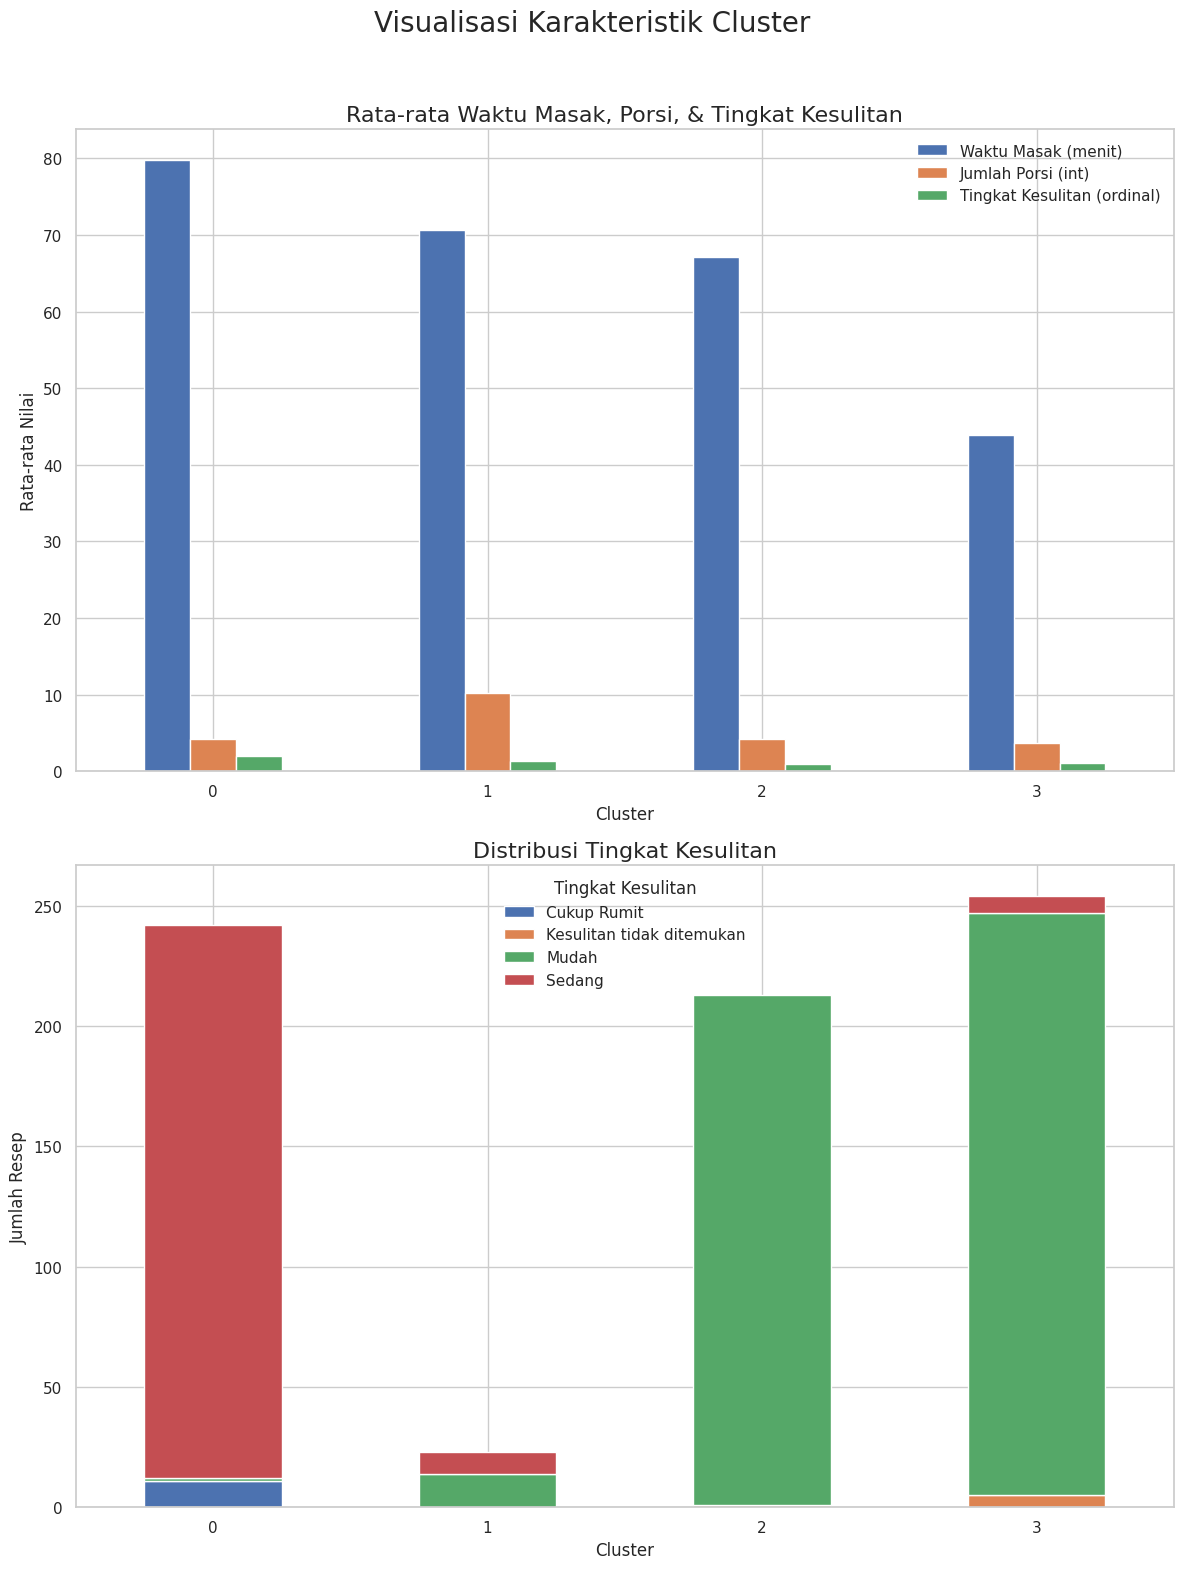

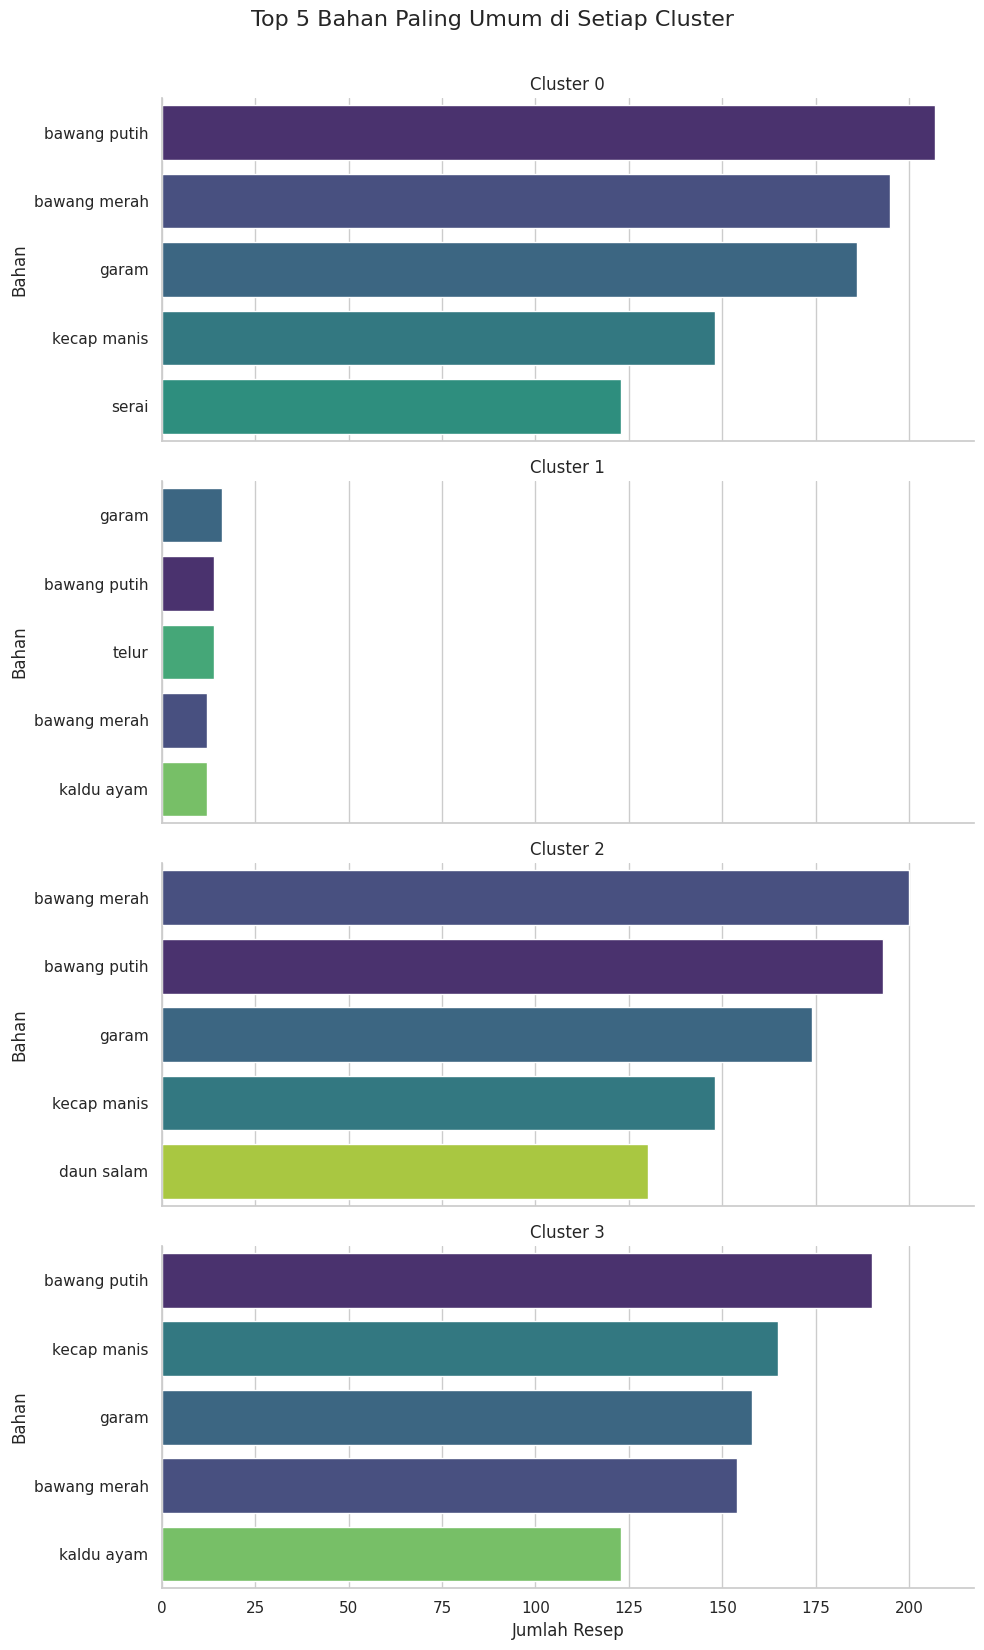


Analisis dan visualisasi selesai.


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Memuat dataset dari file CSV
df_clustered = pd.read_csv("resep_cluster.csv")

# Mengatur gaya visualisasi
sns.set(style="whitegrid")
print("File 'resep_dengan_cluster.csv' berhasil dimuat. Memulai analisis...\n")

# BAGIAN 1: ANALISIS KARAKTERISTIK (OUTPUT TEKS)
print("Analisis Karakteristik Cluster")
print("========================================")

# Analisis Fitur Numerik
print("\n--> Rata-rata Fitur Numerik per Cluster:")
numeric_features = ['Waktu Masak (menit)', 'Jumlah Porsi (int)', 'Tingkat Kesulitan (ordinal)']
cluster_numeric_summary = df_clustered.groupby('Cluster')[numeric_features].mean().round(2)
print(cluster_numeric_summary)

# Analisis Fitur Ordinal
print("\n--> Distribusi Tingkat Kesulitan per Cluster:")
difficulty_distribution = pd.crosstab(df_clustered['Cluster'], df_clustered['Tingkat Kesulitan'])
print(difficulty_distribution)

# Analisis Komposisi Bahan
print("\n--> Top 10 Bahan Paling Sering Muncul per Cluster:")
all_columns = df_clustered.columns.tolist()
start_feature_index = all_columns.index('asam jawa')
ingredient_columns = all_columns[start_feature_index:-1]

ingredient_summary = df_clustered.groupby('Cluster')[ingredient_columns].sum()

for cluster_id in ingredient_summary.index:
    print(f"\n----- Cluster {cluster_id} -----")
    top_10_ingredients = ingredient_summary.loc[cluster_id].sort_values(ascending=False).head(10)
    print(top_10_ingredients)

print("\n========================================\n")

# BAGIAN 2: VISUALISASI HASIL
print("Membuat Visualisasi Hasil Analisis...")

# A. Visualisasi untuk Fitur Numerik dan Ordinal
fig, axes = plt.subplots(2, 1, figsize=(12, 16))
fig.suptitle('Visualisasi Karakteristik Cluster', fontsize=20)

cluster_numeric_summary.plot(kind='bar', ax=axes[0], rot=0)
axes[0].set_title('Rata-rata Waktu Masak, Porsi, & Tingkat Kesulitan', fontsize=16)
axes[0].set_ylabel('Rata-rata Nilai')
axes[0].set_xlabel('Cluster')

difficulty_distribution.plot(kind='bar', stacked=True, ax=axes[1], rot=0)
axes[1].set_title('Distribusi Tingkat Kesulitan', fontsize=16)
axes[1].set_ylabel('Jumlah Resep')
axes[1].set_xlabel('Cluster')
axes[1].legend(title='Tingkat Kesulitan')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# B. Visualisasi untuk Komposisi Bahan (dibuat terpisah)
plot_data_list = []
# Loop melalui ringkasan bahan dengan cara yang lebih aman
for cluster_id, ingredients_series in ingredient_summary.iterrows():
    top_5 = ingredients_series.nlargest(5)
    for ingredient_name, count in top_5.items():
        plot_data_list.append({
            'Cluster': f'Cluster {cluster_id}',
            'Bahan': ingredient_name,
            'Jumlah': int(count)
        })
df_plot = pd.DataFrame(plot_data_list)

# Membuat plot menggunakan catplot
g = sns.catplot(
    data=df_plot,
    x='Jumlah',
    y='Bahan',
    col='Cluster',
    kind='bar',
    col_wrap=1,
    sharey=False,
    height=4,
    aspect=2.5,
    palette='viridis'
)
g.fig.suptitle('Top 5 Bahan Paling Umum di Setiap Cluster', fontsize=16, y=1.03)
g.set_titles("{col_name}")
g.set_xlabels("Jumlah Resep")
g.set_ylabels("Bahan")
plt.show()

print("\nAnalisis dan visualisasi selesai.")

Cluster 0: "Masakan Rumit Tradisional"

Cluster ini berisi resep-resep dengan waktu masak paling lama (rata-rata hampir 80 menit) dan tingkat kesulitan yang cenderung lebih tinggi dibanding klaster lain, bahkan ada beberapa yang masuk kategori cukup rumit. Porsinya sekitar 4 orang, cukup standar untuk masakan keluarga. Komposisi bahan dominan seperti bawang putih, bawang merah, kecap manis, jahe, dan serai menunjukkan bahwa masakan dalam klaster ini cenderung kaya rempah dan teknik memasaknya lebih kompleks. Resep-resep dalam klaster ini cocok untuk acara-acara khusus, makanan rumahan khas, atau menu yang membutuhkan perhatian lebih.


Cluster 1: "Masakan Porsi Besar untuk Banyak Orang"

Cluster ini ditandai dengan porsi paling besar dari semua kelompok, mencapai rata-rata 10 porsi. Waktu memasaknya masih cukup lama (sekitar 71 menit), namun tingkat kesulitannya relatif rendah hingga sedang. Ini menunjukkan bahwa meskipun resepnya besar, prosesnya tetap bisa diikuti dengan mudah. Bahan-bahan yang sering digunakan seperti garam, telur, kaldu ayam, dan bawang putih menunjukkan kesederhanaan komposisi. Cluster ini sangat cocok untuk kebutuhan masak massal, seperti hajatan kecil, acara keluarga besar, atau untuk meal prep dalam jumlah banyak.


Cluster 2: "Masakan Rumahan Sehari-Hari"

Resep dalam klaster ini memiliki karakteristik yang sangat sesuai untuk kebutuhan harian: porsi cukup (sekitar 4 orang), waktu masak sedang (67 menit), dan seluruhnya berada pada tingkat kesulitan mudah. Ini menjadikan Cluster 2 sebagai representasi ideal masakan sehari-hari di rumah. Dominasi bahan seperti daun salam, cabai merah, bawang merah, dan kemiri menunjukkan jenis masakan Indonesia sederhana tapi tetap kaya rasa. Cocok untuk pengguna yang ingin memasak praktis namun tetap dengan cita rasa rumahan yang khas.


Cluster 3: "Masakan Cepat dan Praktis"

Cluster ini terdiri dari resep-resep paling ringan dari segi waktu dan kesulitan. Dengan waktu memasak tercepat (sekitar 44 menit) dan porsi paling kecil (sekitar 3–4 orang), serta hampir seluruhnya tergolong mudah, klaster ini sangat cocok untuk anak kos, pemula, atau siapa pun yang ingin memasak dengan cepat. Bahan utama yang sering muncul seperti kecap manis, telur, cabai rawit, dan kaldu ayam menunjukkan masakan praktis dan hemat waktu. Resep-resep di klaster ini cocok dijadikan andalan saat butuh makanan enak dalam waktu singkat.

# PCA

In [38]:
# 1. Load ulang data dari file CSV terbaru
df_scaled = pd.read_csv("data_resep_scaled_new.csv")

# 2. Bersihkan kolom dari newline dan spasi
df_scaled.columns = df_scaled.columns.str.strip()

# 3. Ulangi list kolom one-hot
one_hot_columns = [
    'asam jawa', 'bawang', 'bawang merah', 'bawang putih', 'cabai', 'cabai hijau',
    'cabai merah', 'cabai rawit', 'cengkih', 'cuka', 'daging ayam', 'daging kambing',
    'daging sapi', 'daun bawang', 'daun jeruk', 'daun salam', 'garam', 'gula',
    'gula merah', 'gula pasir', 'ikan', 'jagung', 'jahe', 'jamur', 'jeruk nipis',
    'kacang', 'kaldu ayam', 'kaldu sapi', 'kayu manis', 'kecap manis', 'kemangi',
    'kemiri', 'kencur', 'ketumbar', 'kol', 'kunyit', 'lengkuas', 'limau', 'merica',
    'santan', 'seledri', 'serai', 'tahu', 'telur', 'tempe', 'tomat', 'udang',
    'wijen', 'wortel'
]

# 4. Scaling one-hot
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled_onehot = pd.DataFrame(scaler.fit_transform(df_scaled[one_hot_columns]), columns=one_hot_columns)

# 5. Gabungkan semua fitur ter-scale
final_features = pd.concat([
    df_scaled_onehot,
    df_scaled[['Waktu Masak (menit)_scaled', 'Jumlah Porsi (int)_scaled', 'Tingkat Kesulitan (ordinal)_scaled']]
], axis=1)



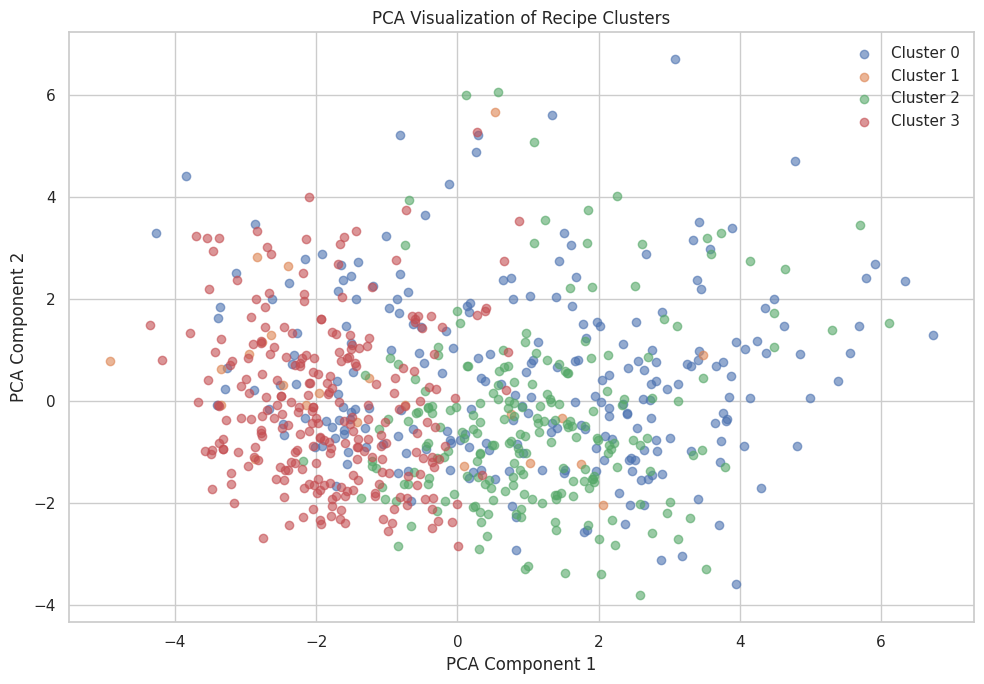

In [44]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(final_features)
df_pca = pd.DataFrame(data=pca_result, columns=["PCA1", "PCA2"])

# Load cluster
df_cluster = pd.read_csv("resep_cluster.csv")
df_pca["Cluster"] = df_cluster["Cluster"]

# Plot
plt.figure(figsize=(10, 7))
for cluster in sorted(df_pca["Cluster"].unique()):
    subset = df_pca[df_pca["Cluster"] == cluster]
    plt.scatter(subset["PCA1"], subset["PCA2"], label=f"Cluster {cluster}", alpha=0.6)

plt.title("PCA Visualization of Recipe Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()